# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

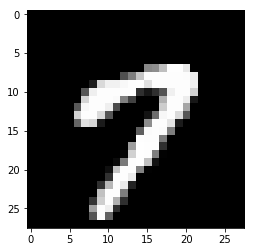

In [6]:
img = mnist.train.images[15]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [18]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value
image_size = mnist.train.images.shape[1]
# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, shape= [None,image_size], name = 'inputs') 
targets_ = tf.placeholder(tf.float32, shape= [None,image_size], name = 'targets') 

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits = logits, labels = targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [19]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [20]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6943
Epoch: 1/20... Training loss: 0.6907
Epoch: 1/20... Training loss: 0.6871
Epoch: 1/20... Training loss: 0.6833
Epoch: 1/20... Training loss: 0.6779
Epoch: 1/20... Training loss: 0.6725
Epoch: 1/20... Training loss: 0.6657
Epoch: 1/20... Training loss: 0.6570
Epoch: 1/20... Training loss: 0.6473
Epoch: 1/20... Training loss: 0.6365
Epoch: 1/20... Training loss: 0.6239
Epoch: 1/20... Training loss: 0.6113
Epoch: 1/20... Training loss: 0.5947
Epoch: 1/20... Training loss: 0.5805
Epoch: 1/20... Training loss: 0.5619
Epoch: 1/20... Training loss: 0.5466
Epoch: 1/20... Training loss: 0.5248
Epoch: 1/20... Training loss: 0.5085
Epoch: 1/20... Training loss: 0.4923
Epoch: 1/20... Training loss: 0.4787
Epoch: 1/20... Training loss: 0.4551
Epoch: 1/20... Training loss: 0.4383
Epoch: 1/20... Training loss: 0.4307
Epoch: 1/20... Training loss: 0.4121
Epoch: 1/20... Training loss: 0.4004
Epoch: 1/20... Training loss: 0.3880
Epoch: 1/20... Training loss: 0.3797
E

Epoch: 1/20... Training loss: 0.1914
Epoch: 1/20... Training loss: 0.1965
Epoch: 1/20... Training loss: 0.1943
Epoch: 1/20... Training loss: 0.1908
Epoch: 1/20... Training loss: 0.1876
Epoch: 1/20... Training loss: 0.1819
Epoch: 1/20... Training loss: 0.1884
Epoch: 1/20... Training loss: 0.1822
Epoch: 1/20... Training loss: 0.1911
Epoch: 1/20... Training loss: 0.1845
Epoch: 1/20... Training loss: 0.1898
Epoch: 1/20... Training loss: 0.1895
Epoch: 1/20... Training loss: 0.1866
Epoch: 1/20... Training loss: 0.1856
Epoch: 1/20... Training loss: 0.1899
Epoch: 1/20... Training loss: 0.1869
Epoch: 1/20... Training loss: 0.1902
Epoch: 1/20... Training loss: 0.1897
Epoch: 1/20... Training loss: 0.1799
Epoch: 1/20... Training loss: 0.1835
Epoch: 1/20... Training loss: 0.1878
Epoch: 1/20... Training loss: 0.1868
Epoch: 1/20... Training loss: 0.1851
Epoch: 1/20... Training loss: 0.1800
Epoch: 1/20... Training loss: 0.1847
Epoch: 1/20... Training loss: 0.1816
Epoch: 1/20... Training loss: 0.1828
E

Epoch: 2/20... Training loss: 0.1620
Epoch: 2/20... Training loss: 0.1543
Epoch: 2/20... Training loss: 0.1528
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1524
Epoch: 2/20... Training loss: 0.1591
Epoch: 2/20... Training loss: 0.1644
Epoch: 2/20... Training loss: 0.1596
Epoch: 2/20... Training loss: 0.1570
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1593
Epoch: 2/20... Training loss: 0.1556
Epoch: 2/20... Training loss: 0.1580
Epoch: 2/20... Training loss: 0.1556
Epoch: 2/20... Training loss: 0.1540
Epoch: 2/20... Training loss: 0.1524
Epoch: 2/20... Training loss: 0.1511
Epoch: 2/20... Training loss: 0.1538
Epoch: 2/20... Training loss: 0.1592
Epoch: 2/20... Training loss: 0.1584
Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1581
Epoch: 2/20... Training loss: 0.1504
Epoch: 2/20... Training loss: 0.1539
Epoch: 2/20... Training loss: 0.1516
Epoch: 2/20... Training loss: 0.1471
Epoch: 2/20... Training loss: 0.1528
E

Epoch: 3/20... Training loss: 0.1391
Epoch: 3/20... Training loss: 0.1354
Epoch: 3/20... Training loss: 0.1399
Epoch: 3/20... Training loss: 0.1353
Epoch: 3/20... Training loss: 0.1326
Epoch: 3/20... Training loss: 0.1340
Epoch: 3/20... Training loss: 0.1377
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1328
Epoch: 3/20... Training loss: 0.1350
Epoch: 3/20... Training loss: 0.1381
Epoch: 3/20... Training loss: 0.1375
Epoch: 3/20... Training loss: 0.1332
Epoch: 3/20... Training loss: 0.1293
Epoch: 3/20... Training loss: 0.1340
Epoch: 3/20... Training loss: 0.1403
Epoch: 3/20... Training loss: 0.1343
Epoch: 3/20... Training loss: 0.1359
Epoch: 3/20... Training loss: 0.1351
Epoch: 3/20... Training loss: 0.1327
Epoch: 3/20... Training loss: 0.1310
Epoch: 3/20... Training loss: 0.1293
Epoch: 3/20... Training loss: 0.1333
Epoch: 3/20... Training loss: 0.1302
Epoch: 3/20... Training loss: 0.1289
Epoch: 3/20... Training loss: 0.1355
Epoch: 3/20... Training loss: 0.1331
E

Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1263
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1249
Epoch: 4/20... Training loss: 0.1269
Epoch: 4/20... Training loss: 0.1247
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1253
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1255
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1179
Epoch: 4/20... Training loss: 0.1215
E

Epoch: 4/20... Training loss: 0.1157
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1145
Epoch: 4/20... Training loss: 0.1173
Epoch: 4/20... Training loss: 0.1141
Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1148
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1140
Epoch: 4/20... Training loss: 0.1173
Epoch: 4/20... Training loss: 0.1139
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1133
Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1144
Epoch: 4/20... Training loss: 0.1141
Epoch: 4/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1168
Epoch: 5/20... Training loss: 0.1153
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1206
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1171
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1161
E

Epoch: 6/20... Training loss: 0.1079
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1084
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1009
Epoch: 6/20... Training loss: 0.1084
Epoch: 6/20... Training loss: 0.1128
Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1096
Epoch: 6/20... Training loss: 0.1079
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1081
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1012
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1085
E

Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.1051
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1051
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1051
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1056
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1047
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1067
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1048
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1045
E

Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.1021
Epoch: 8/20... Training loss: 0.1041
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.1031
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.1019
Epoch: 8/20... Training loss: 0.0998
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.1035
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.1020
Epoch: 8/20... Training loss: 0.1008
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.1044
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0987
E

Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.1037
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.1036
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0942
Epoch: 8/20... Training loss: 0.1019
Epoch: 8/20... Training loss: 0.1015
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.1003
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.1028
Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0949
Epoch: 8/20... Training loss: 0.1000
E

Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.1001
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.1001
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.1006
Epoch: 9/20... Training loss: 0.0998
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0991
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0974
E

Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0973
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0987
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.1007
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.1004
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.1007
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.1002
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0980
Epoch: 11/20... Training loss: 0.0972
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0985
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.1000
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0919
Epoch: 11/20... Training loss: 0.0919
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0981
Epoch: 11/20... Training loss: 0.0912
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0912
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0988
Epoch: 11/20... Training loss: 0.0979
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0914
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0967
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0976
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0913
Epoch: 12/20... Training loss: 0.0913
Epoch: 12/20... Training loss: 0.0894
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0994
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0907
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20... Training loss: 0.0984
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0903
Epoch: 13/20... Training loss: 0.0912
Epoch: 13/20... Training loss: 0.0899
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0969
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0979
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0978
Epoch: 14/20... Training loss: 0.0901
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0895
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0900
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0973
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0971
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0895
Epoch: 15/20... Training loss: 0.0969
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0972
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0986
Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0971
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0906
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0896
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0964
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0872
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0904
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0967
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0906
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0903
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0900
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0972
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0958
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0991
Epoch: 18/20... Training loss: 0.0970
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0968
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0962
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0911
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0894
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0899
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0981
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.1004
Epoch: 19/20... Training loss: 0.0968
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0984
Epoch: 19/20... Training loss: 0.0902
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0900
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0973
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0970
Epoch: 20/20... Training loss: 0.0900
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0892
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0976


## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

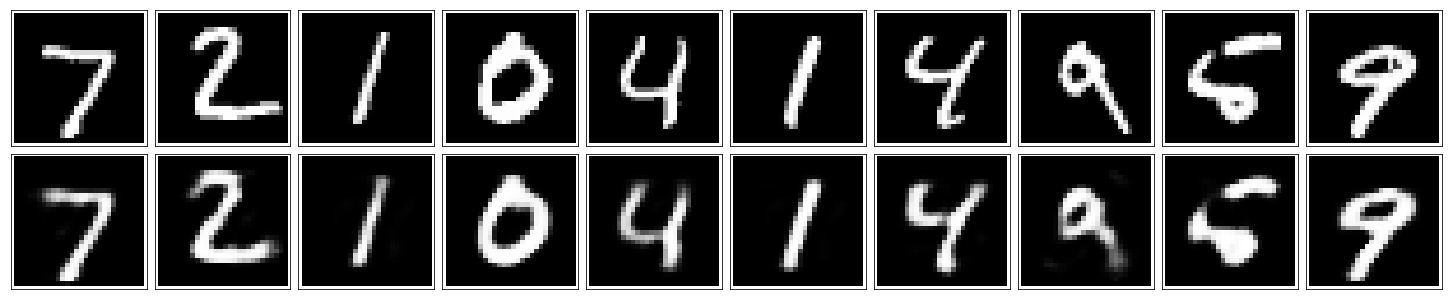

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [22]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.